# Task 2: Exploratory Data Analysis of Meteorite Landings

## Step 1: The Setup (Loading and Inspecting the Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Load the .csv file into a Pandas DataFrame.

In [2]:
df = pd.read_csv('meteorite-landings.csv')

In [3]:
df.rename(columns={'mass (g)': 'mass'}, inplace=True)

Inspect the first few rows using `.head()`.

In [4]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


Get a summary of the data using `.info()`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


Generate descriptive statistics for `mass`, `year`, `reclat`, and `reclong` using `.describe()`.

In [6]:
df.describe(include='all')

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425.000000,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,NaN,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,NaN,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,NaN,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,1991.828817,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,25.052766,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,860.000000,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,1987.000000,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,1998.000000,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,2003.000000,0.000000,157.166670,NaN


## Step 2: The Cleanup Crew (Data Cleaning and Preparation)

### Handle Missing Values

In [7]:
df_cleaned = df.dropna(subset=['mass', 'year', 'reclat', 'reclong']).copy()

### Filter Out Erroneous Data

In [8]:
# Filter out meteorites with a mass of 0 or less
df_cleaned = df_cleaned[df_cleaned['mass'] > 0]

# Filter out invalid coordinates (0,0 is a common placeholder)
df_cleaned = df_cleaned[~((df_cleaned['reclat'] == 0) & (df_cleaned['reclong'] == 0))]

# Convert 'year' to a numeric type, coercing errors, then drop rows with NaN in 'year'\ndf_cleaned['year'] = pd.to_numeric(df_cleaned['year'], errors='coerce')\ndf_cleaned.dropna(subset=['year'], inplace=True)
df_cleaned['year'] = df_cleaned['year'].astype(int)

### Create New Columns

In [9]:
df_cleaned['mass_kg'] = df_cleaned['mass'] / 1000

### Inspect Cleaned Data

In [10]:
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 31911 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         31911 non-null  object 
 1   id           31911 non-null  int64  
 2   nametype     31911 non-null  object 
 3   recclass     31911 non-null  object 
 4   mass         31911 non-null  float64
 5   fall         31911 non-null  object 
 6   year         31911 non-null  int64  
 7   reclat       31911 non-null  float64
 8   reclong      31911 non-null  float64
 9   GeoLocation  31911 non-null  object 
 10  mass_kg      31911 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.9+ MB


,id,mass,year,reclat,reclong,mass_kg
count,31911.000000,3.191100e+04,31911.000000,31911.000000,31911.000000,31911.000000
mean,20760.535928,1.855334e+04,1986.983611,-47.325541,73.217418,18.553345
std,14906.364706,6.870431e+05,26.723522,46.668084,83.196982,687.043060
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330,0.000010
25%,9241.500000,6.500000e+00,1982.000000,-79.683330,26.000000,0.006500
50%,18613.000000,2.968000e+01,1991.000000,-72.000000,56.837750,0.029680
75%,27230.500000,2.021050e+02,2000.000000,18.321420,159.394165,0.202105
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000,60000.000000


## Step 3: The Detective Work (Analysis and Insights)

### Filtering & Sorting: Find the 10 heaviest meteorites.

In [11]:
heaviest_10 = df_cleaned.nlargest(10, 'mass_kg')
heaviest_10[['name', 'mass_kg']]

,name,mass_kg
16392,Hoba,60000.0
5373,Cape York,58200.0
5365,Campo del Cielo,50000.0
5370,Canyon Diablo,30000.0
3455,Armanty,28000.0
12613,Gibeon,26000.0
5468,Chupaderos,24300.0
26297,Mundrabilla,24000.0
920,Sikhote-Alin,23000.0
5016,Bacubirito,22000.0


### Grouping & Aggregation: Determine the count of Fell vs. Found meteorites and find the average mass for the most common classifications.

In [12]:
fall_counts = df_cleaned['fall'].value_counts()
fall_counts

fall
Found    30847
Fell      1064
Name: count, dtype: int64

In [13]:
common_classifications = df_cleaned['recclass'].value_counts().nlargest(10).index
avg_mass_by_class = df_cleaned[df_cleaned['recclass'].isin(common_classifications)].groupby('recclass')['mass_kg'].mean().sort_values(ascending=False)
avg_mass_by_class

recclass
L5      2.832226
H5      2.563559
L4      2.130273
H4/5    1.758714
L6      1.708344
LL6     1.247387
H6      1.112691
H4      1.098060
CM2     0.536110
LL5     0.504137
Name: mass_kg, dtype: float64

### Time-Based Analysis: Group data by decade to analyze discovery trends.

In [14]:
df_cleaned['decade'] = (df_cleaned['year'] // 10) * 10
decade_counts = df_cleaned.groupby('decade').size()
decade_counts

decade
860        1
1390       1
1490       2
1570       1
1580       1
1600       1
1620       3
1630       2
1660       1
1670       1
1680       1
1710       2
1720       2
1740       3
1750       3
1760       3
1770       3
1780       5
1790      11
1800      21
1810      30
1820      28
1830      33
1840      47
1850      71
1860      95
1870      88
1880     121
1890     125
1900     136
1910     151
1920     157
1930     298
1940     188
1950     201
1960     375
1970    4954
1980    6801
1990    9061
2000    8060
2010     823
dtype: int64

### NumPy Operations: On the mass_kg column (as a NumPy array), calculate and explain the mean, median, std, sum, and max.

In [15]:
mass_np = df_cleaned['mass_kg'].to_numpy()
print(f"Mean: {np.mean(mass_np)}")
print(f"Median: {np.median(mass_np)}")
print(f"Standard Deviation: {np.std(mass_np)}")
print(f"Sum: {np.sum(mass_np)}")
print(f"Max: {np.max(mass_np)}")

Mean: 18.553344917896645
Median: 0.029679999999999998
Standard Deviation: 687.0322946310675
Sum: 592055.7896749999
Max: 60000.0


## Step 4: Tell the Story (Visualization)

### Bar Chart: Top 10 Heaviest Meteorites

/tmp/ipykernel_8014/2535066076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mass_kg', y='name', data=heaviest_10, palette='viridis')


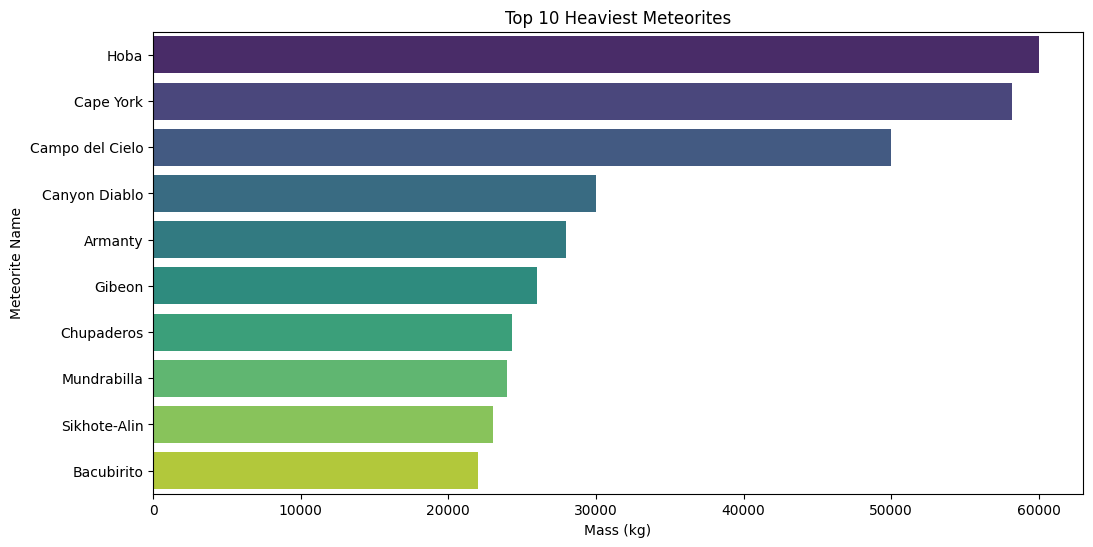

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='mass_kg', y='name', data=heaviest_10, palette='viridis')
plt.title('Top 10 Heaviest Meteorites')
plt.xlabel('Mass (kg)')
plt.ylabel('Meteorite Name')
plt.show()

### Pie Chart: Fell vs. Found Meteorites

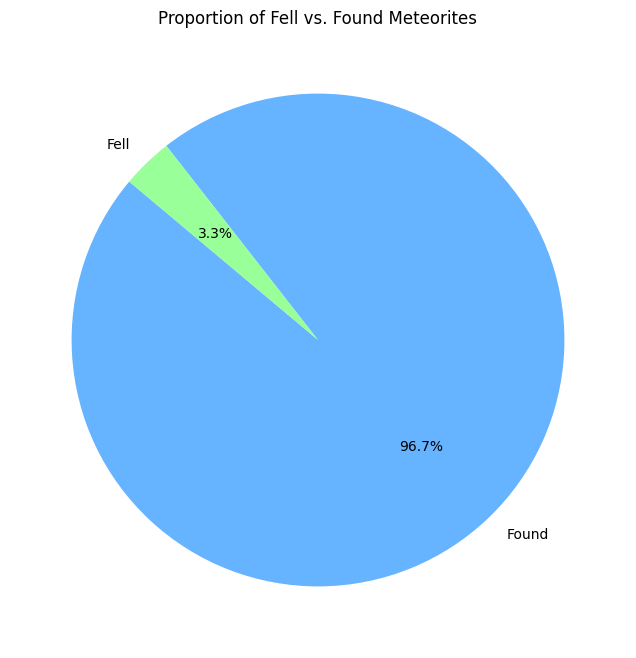

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(fall_counts, labels=fall_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Proportion of Fell vs. Found Meteorites')
plt.ylabel('')
plt.show()

### Bar Chart: Average Mass for Most Common Classifications

/tmp/ipykernel_8014/1137255777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_mass_by_class.index, y=avg_mass_by_class.values, palette='plasma')


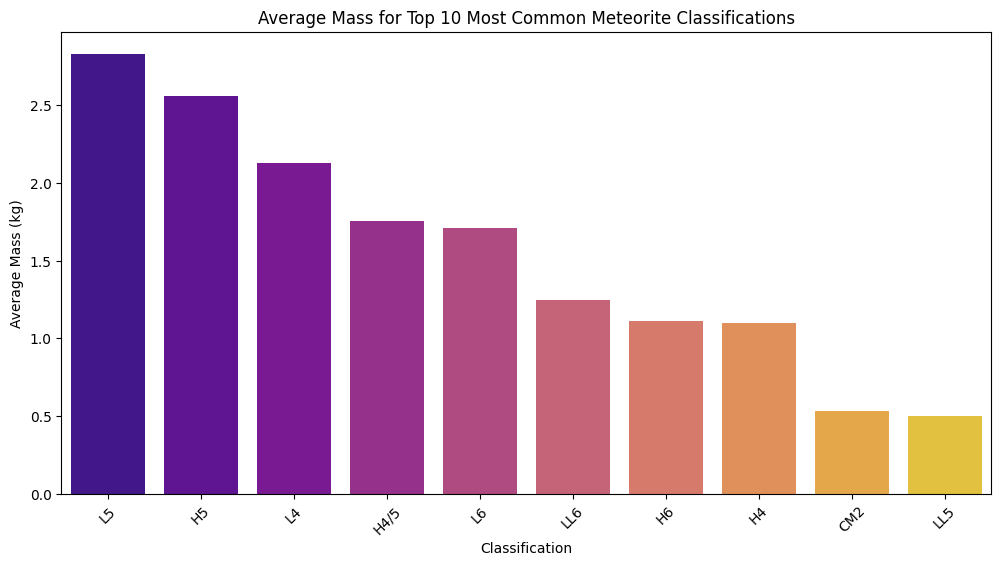

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_mass_by_class.index, y=avg_mass_by_class.values, palette='plasma')
plt.title('Average Mass for Top 10 Most Common Meteorite Classifications')
plt.xlabel('Classification')
plt.ylabel('Average Mass (kg)')
plt.xticks(rotation=45)
plt.show()

### Line Chart: Meteorite Discoveries by Decade

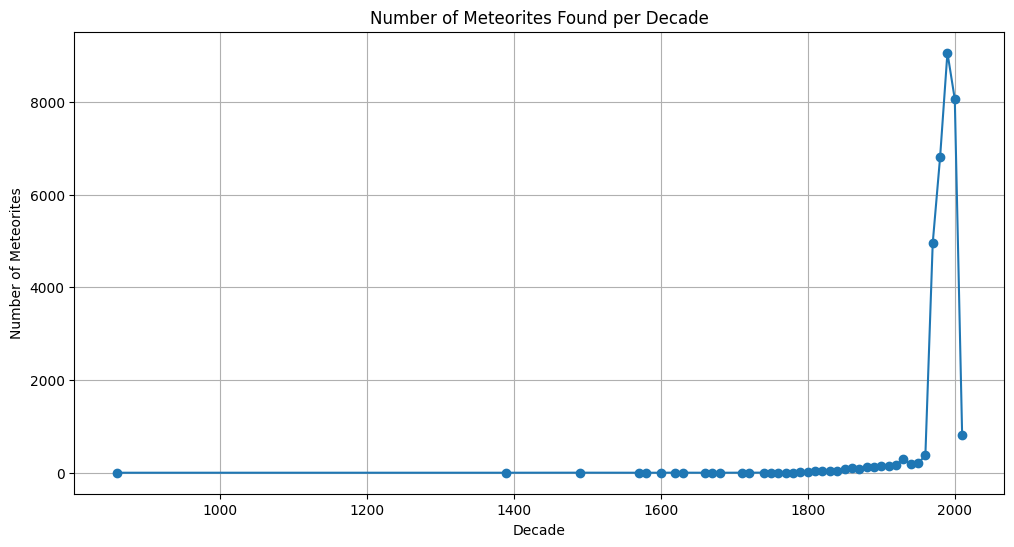

In [19]:
plt.figure(figsize=(12, 6))
decade_counts.plot(kind='line', marker='o')
plt.title('Number of Meteorites Found per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Meteorites')
plt.grid(True)
plt.show()

## Bonus Challenge: Interactive Geospatial Mapping

In [20]:
# Create a map centered around the mean latitude and longitudem = folium.Map(location=[df_cleaned['reclat'].mean(), df_cleaned['reclong'].mean()], zoom_start=2)# Create a smaller sample for the map to keep the notebook size manageabledf_sample = df_cleaned.sample(n=500, random_state=42)# Add markers for each meteorite landingfor idx, row in df_sample.iterrows():    folium.Marker(        location=[row['reclat'], row['reclong']],        popup=f"{row['name']} ({row['year']}) - {row['mass_kg']:.2f} kg",        tooltip=row['name']    ).add_to(m)# Display the mapm

## Conclusion

This exploratory data analysis of the meteorite landings dataset has yielded several key insights:

- **Mass Distribution:** The vast majority of meteorites are relatively small, with a few exceptionally large outliers. The heaviest meteorite, Hoba, is significantly more massive than the others.
- **Fell vs. Found:** A significantly larger number of meteorites are found rather than observed falling. This suggests that many meteorites land unnoticed and are discovered later.
- **Common Classifications:** The most common meteorite classifications (e.g., L6, H5) have varying average masses, with some of the less common types having a higher average mass.
- **Discovery Trends:** The number of meteorite discoveries has increased dramatically over time, particularly in the latter half of the 20th century. This is likely due to advances in technology and increased interest in meteorite hunting.
- **Geospatial Distribution:** Meteorite landings are distributed across the globe, with some clustering in specific regions. The interactive map provides a powerful tool for exploring these patterns.